## Set Library Path

In [1]:
.libPaths("/share/korflab/home/viki/anaconda3/jupyter_nb/lib/R/library")

## Update Bioconductor

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(version = "3.17")

## Install Packages

In [ ]:
# ComplexHeatmap
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ComplexHeatmap")

# dplyr
install.packages("dplyr")

# tidyr
install.packages("tidyr")

# reshape2
install.packages("reshape2")

# MASS
install.packages("MASS")

## Load Packages

In [33]:
library(ComplexHeatmap)
library(dplyr)
library(tidyr)
library(reshape2)
library(stringr)
library(MASS)

## Load Dataframe

In [58]:
# Load data
df <- read.csv("peak_counts.csv", header = TRUE)

# Remove unnecessary data columns
df$Filename <- NULL
df$Peaks <- NULL

# View data
head(df)

# View peak counts
cat("Min Peaks:", min(df$Peak_Counts), "\n")
cat("Max Peaks:", max(df$Peak_Counts), "\n")

,Peak_Counts,Project,Control,Peak_Type,Aligner,Peak_Caller,Deduplicator,Test
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,308549,Namani,no_control,broad,STAR,genrich,no_deduplication,test1
2,308549,Namani,no_control,broad,STAR,genrich,no_deduplication,test2
3,308549,Namani,no_control,broad,STAR,genrich,no_deduplication,test3
4,216046,Namani,no_control,broad,STAR,genrich,picard,test1
5,216046,Namani,no_control,broad,STAR,genrich,picard,test2
6,216046,Namani,no_control,broad,STAR,genrich,picard,test3


Min Peaks: 29 
Max Peaks: 1736340 


In [59]:
# Log10 transform data
df$Peak_Counts <- log10(df$Peak_Counts)

# View log-transformed peak counts
cat("Min Peaks:", min(df$Peak_Counts), "\n")
cat("Max Peaks:", max(df$Peak_Counts), "\n")

Min Peaks: 1.462398 
Max Peaks: 6.239635 


In [8]:
# Log2 transform data
#df$Peak_Counts <- log2(df$Peak_Counts)

# View log-transformed peak counts
#cat("Min Peaks:", min(df$Peak_Counts), "\n")
#cat("Max Peaks:", max(df$Peak_Counts), "\n")

Min Peaks: 4.857981 
Max Peaks: 20.72762 


In [20]:
# Natural log transform data
#df$Peak_Counts <- log(df$Peak_Counts)

# View log-transformed peak counts
#cat("Min Peaks:", min(df$Peak_Counts), "\n")
#cat("Max Peaks:", max(df$Peak_Counts), "\n")

Min Peaks: 3.367296 
Max Peaks: 14.36729 


Min Peaks: 4.312992 
Max Peaks: 46.8647 


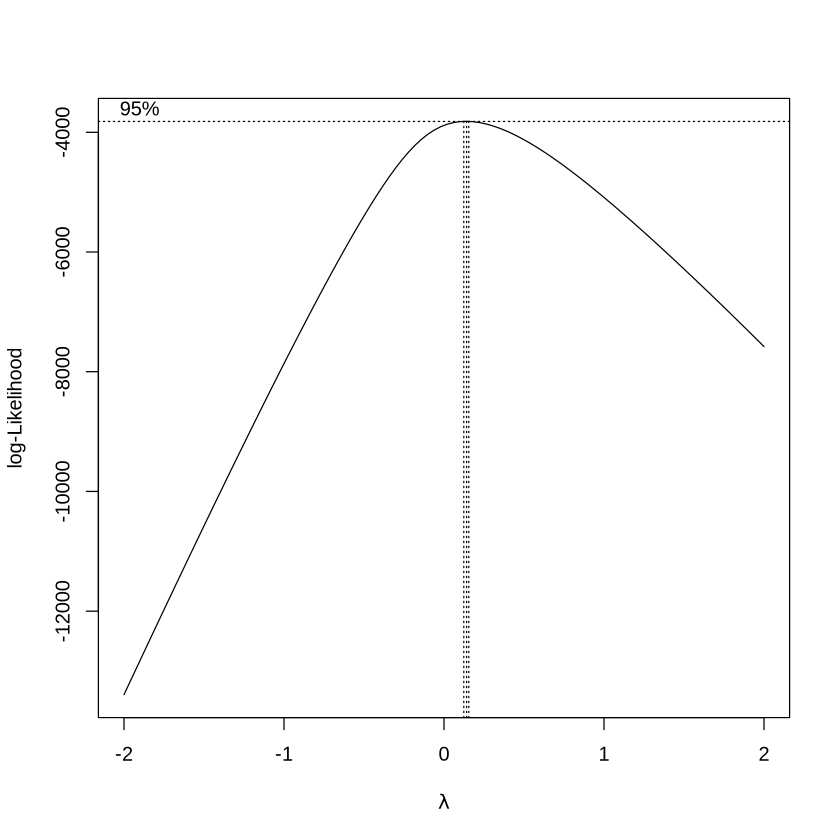

In [46]:
# Box-Cox transform data
#boxcox_trans <- boxcox(df$Peak_Counts ~ 1, lambda = seq(-2, 2, by = 0.1))

# Find the optimal lambda
#best_lambda <- boxcox_trans$x[which.max(boxcox_trans$y)]

# Apply the Box-Cox transformation using the optimal lambda
#df$Peak_Counts <- (df$Peak_Counts^best_lambda - 1) / best_lambda

# View transformed peak counts
#cat("Min Peaks:", min(df$Peak_Counts), "\n")
#cat("Max Peaks:", max(df$Peak_Counts), "\n")

In [60]:
# Format data

# Select data of interest
heatmap_data <- df[c("Peak_Counts", "Project", "Control", "Peak_Type", "Aligner", "Peak_Caller", "Deduplicator", "Test")]

# Combine variables for plotting
heatmap_data$x_axis_labels <- paste(heatmap_data$Peak_Caller, heatmap_data$Deduplicator, heatmap_data$Test, sep = "_")
heatmap_data$y_axis_labels <- paste(heatmap_data$Control, heatmap_data$Peak_Type, heatmap_data$Aligner, sep = "_")

## Namani et al. 2019

### Create matrix

In [61]:
# Subset for Namani data
Namani <- heatmap_data[heatmap_data$Project == "Namani", ]

# Melt the data from the heatmap_data dataframe
melted_Namani <- melt(Namani, id.vars = c("x_axis_labels", "y_axis_labels"), measure.vars = "Peak_Counts")

# Cast the data into the desired format
casted_Namani <- dcast(melted_Namani, y_axis_labels ~ x_axis_labels, value.var = "value")

# Generate matrices
rownames(casted_Namani) <- casted_Namani$y_axis_labels
casted_Namani$y_axis_labels <- NULL
Namani_matrix <- as.matrix(casted_Namani)

# Transpose matrix to switch rows and columns
Namani_matrix <- t(Namani_matrix)

head(Namani_matrix)

,no_control_broad_bowtie2,no_control_broad_bwa_mem,no_control_broad_STAR,no_control_narrow_bowtie2,no_control_narrow_bwa_mem,no_control_narrow_STAR,with_control_broad_bowtie2,with_control_broad_bwa_mem,with_control_broad_STAR,with_control_narrow_bowtie2,with_control_narrow_bwa_mem,with_control_narrow_STAR
cisgenome_no_deduplication_test1,NA,NA,NA,NA,NA,NA,3.800305,3.803389,3.828982,3.800305,3.803389,3.828982
cisgenome_no_deduplication_test2,NA,NA,NA,NA,NA,NA,3.800305,3.803389,3.828982,3.800305,3.803389,3.828982
cisgenome_no_deduplication_test3,NA,NA,NA,NA,NA,NA,3.800305,3.803389,3.828982,3.800305,3.803389,3.828982
cisgenome_picard_test1,NA,NA,NA,NA,NA,NA,3.544564,3.554004,3.562412,3.544564,3.554004,3.562412
cisgenome_picard_test2,NA,NA,NA,NA,NA,NA,3.544564,3.554004,3.562412,3.544564,3.554004,3.562412
cisgenome_picard_test3,NA,NA,NA,NA,NA,NA,3.544564,3.554004,3.562412,3.544564,3.554004,3.562412


### Prepare metadata 

In [62]:
# Save matrix as data frame for manipulation
Namani_metadata <- as.data.frame(Namani_matrix)

# Peak Caller
new_row_names <- sub("^(.*?)_.*$", "\\1", rownames(Namani_matrix))
replacement_rules <- c("cisgenome" = "Cisgenome", "macs3" = "MACS3", "pepr" = "PePr", "genrich" = "Genrich")
new_row_names <- sapply(new_row_names, function(name) {
  if (name %in% names(replacement_rules)) {
    return(replacement_rules[name])
  } else {
    return(name)
  }
})
Namani_metadata$Peak_Caller <- new_row_names

# Deduplicator
new_row_names <- str_extract(rownames(Namani_matrix), "(?<=_)[^_]+")
replacement_rules <- c("no" = "None", "sambamba" = "Sambamba", "picard" = "Picard", "samtools" = "Samtools")
new_row_names <- sapply(new_row_names, function(name) {
  if (name %in% names(replacement_rules)) {
    return(replacement_rules[name])
  } else {
    return(name)
  }
})
Namani_metadata$Deduplicator <- new_row_names

# Test_Dataset
Namani_metadata$Test <- as.integer(gsub(".*_test(\\d+)$", "\\1", rownames(Namani_matrix)))

# View
head(Namani_metadata)

,no_control_broad_bowtie2,no_control_broad_bwa_mem,no_control_broad_STAR,no_control_narrow_bowtie2,no_control_narrow_bwa_mem,no_control_narrow_STAR,with_control_broad_bowtie2,with_control_broad_bwa_mem,with_control_broad_STAR,with_control_narrow_bowtie2,with_control_narrow_bwa_mem,with_control_narrow_STAR,Peak_Caller,Deduplicator,Test
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
cisgenome_no_deduplication_test1,NA,NA,NA,NA,NA,NA,3.800305,3.803389,3.828982,3.800305,3.803389,3.828982,Cisgenome,None,1
cisgenome_no_deduplication_test2,NA,NA,NA,NA,NA,NA,3.800305,3.803389,3.828982,3.800305,3.803389,3.828982,Cisgenome,None,2
cisgenome_no_deduplication_test3,NA,NA,NA,NA,NA,NA,3.800305,3.803389,3.828982,3.800305,3.803389,3.828982,Cisgenome,None,3
cisgenome_picard_test1,NA,NA,NA,NA,NA,NA,3.544564,3.554004,3.562412,3.544564,3.554004,3.562412,Cisgenome,Picard,1
cisgenome_picard_test2,NA,NA,NA,NA,NA,NA,3.544564,3.554004,3.562412,3.544564,3.554004,3.562412,Cisgenome,Picard,2
cisgenome_picard_test3,NA,NA,NA,NA,NA,NA,3.544564,3.554004,3.562412,3.544564,3.554004,3.562412,Cisgenome,Picard,3


### Create heatmap

In [63]:
# Annotation objects

# Define the desired order for test number
test_number <- c("1", "2", "3")

# Define the desired order for peak type
desired_column_order <- c(
    "with_control_broad_bowtie2", "with_control_broad_bwa_mem", "with_control_broad_STAR", 
    "with_control_narrow_bowtie2", "with_control_narrow_bwa_mem", "with_control_narrow_STAR",
    "no_control_broad_bowtie2", "no_control_broad_bwa_mem", "no_control_broad_STAR", 
    "no_control_narrow_bowtie2", "no_control_narrow_bwa_mem", "no_control_narrow_STAR"
)

# Rearrange the columns in matrix
Namani_matrix_reordered <- Namani_matrix[, desired_column_order]

# Define custom grouping factor for column_split
n_blocks <- 4
n_columns_per_block <- 3
block_labels <- rep(1:n_blocks, each = n_columns_per_block)
block_split_factor <- factor(block_labels)

# Split rows by peak caller
row_split_factor <- factor(Namani_metadata$Peak_Caller)

# Row annotations
row_ha <- rowAnnotation(
  `Peak Caller` = factor(Namani_metadata$Peak_Caller, levels = c("Cisgenome", "Genrich", "MACS3", "PePr")),
  `Deduplicator` = factor(Namani_metadata$Deduplicator, levels = c("None", "Picard", "Sambamba", "Samtools")),
  `Test Number` = factor(Namani_metadata$Test, levels = test_number),
  col = list(
    `Peak Caller` = c("Cisgenome" = "#c2ffc3", "Genrich" = "#90ec7c", "MACS3" = "#00b22a", "PePr" = "#006b05"),
    `Deduplicator` = c("None" = "#e6e6fa", "Picard" = "#aea3e0", "Sambamba" = "#835fbd", "Samtools" = "#620093"),
    `Test Number` = c("1" = "#00CCFF", "2" = "#007AFF", "3" = "#0000FF")
  )
)

# Column annotations
col_ha <- HeatmapAnnotation(
  `Endedness` = factor(c(rep("Control", 6), rep("No Control", 6)), levels = c("Control", "No Control")),
  `Peak Type` = factor(c(rep("Broad", 3), rep("Narrow", 3), rep("Broad", 3), rep("Narrow", 3)), levels = c("Broad", "Narrow")),
  `Aligner` = factor(c("Bowtie2", "BWA-MEM", "STAR", "Bowtie2", "BWA-MEM", "STAR", "Bowtie2", "BWA-MEM", "STAR", "Bowtie2", "BWA-MEM", "STAR"), levels = c("Bowtie2", "BWA-MEM", "STAR")),
  col = list(
    `Endedness` = c("Control" = "#f7d3db", "No Control" = "#eb647e"),
    `Peak Type` = c("Broad" = "#ff9a00", "Narrow" = "#ff4d00"),
    `Aligner` = c("Bowtie2" = "#ff0000", "BWA-MEM" = "#8c0000", "STAR" = "#400000")
  )
)

In [64]:
# Create heatmap

pdf("Namani_heatmap.pdf", width = 6, height = 6)

# Heatmap for control
Namani_heatmap_object <- Heatmap(
  # Data
  Namani_matrix_reordered, 
  
  # Column customizations
  cluster_columns = FALSE,
  show_column_names = FALSE,
  column_title = NULL,
  top_annotation = col_ha,
  column_split = block_split_factor,
  column_gap = unit(1, "mm"),
    
  # Row customizations
  cluster_rows = FALSE,
  show_row_names = FALSE,
  row_title = NULL,
  left_annotation = row_ha,
  row_split = row_split_factor,
  row_gap = unit(1, "mm"),

  # Legend customizations
  heatmap_legend_param = list(
    title = "log10(Peak Count)",
    col = colorRampPalette(c("#B2182B", "#EEEEEE", "#2166AC"))(100)
  ),

  # Other customizations
  border = FALSE, 
  width = ncol(Namani_matrix) * unit(5, "mm"), 
  height = nrow(Namani_matrix) * unit(2.2, "mm")
)

ht = draw(Namani_heatmap_object)

# Print width and height to determine appropriate export size
w = ComplexHeatmap:::width(ht)
w = convertX(w, "inch", valueOnly = TRUE)
h = ComplexHeatmap:::height(ht)
h = convertY(h, "inch", valueOnly = TRUE)
c(w, h)

dev.off()

[1] 5.574170 5.949819

png 
  2

## Rube

### Create matrix

In [65]:
# Subset for Rube data
Rube <- heatmap_data[heatmap_data$Project == "Rube", ]

# Melt the data from the heatmap_data dataframe
melted_Rube <- melt(Rube, id.vars = c("x_axis_labels", "y_axis_labels"), measure.vars = "Peak_Counts")

# Cast the data into the desired format
casted_Rube <- dcast(melted_Rube, y_axis_labels ~ x_axis_labels, value.var = "value")

# Generate matrices
rownames(casted_Rube) <- casted_Rube$y_axis_labels
casted_Rube$y_axis_labels <- NULL
Rube_matrix <- as.matrix(casted_Rube)

# Transpose matrix to switch rows and columns
Rube_matrix <- t(Rube_matrix)

head(Rube_matrix)

,no_control_broad_bowtie2,no_control_broad_bwa_mem,no_control_broad_STAR,no_control_narrow_bowtie2,no_control_narrow_bwa_mem,no_control_narrow_STAR,with_control_broad_bowtie2,with_control_broad_bwa_mem,with_control_broad_STAR,with_control_narrow_bowtie2,with_control_narrow_bwa_mem,with_control_narrow_STAR
cisgenome_no_deduplication_test1,NA,NA,NA,NA,NA,NA,3.347915,3.319314,3.492760,3.347915,3.319314,3.492760
cisgenome_no_deduplication_test2,NA,NA,NA,NA,NA,NA,3.347915,3.319314,3.492760,3.347915,3.319314,3.492760
cisgenome_no_deduplication_test3,NA,NA,NA,NA,NA,NA,3.347915,3.319314,3.492760,3.347915,3.319314,3.492760
cisgenome_picard_test1,NA,NA,NA,NA,NA,NA,4.217879,4.191814,3.772175,4.217879,5.243279,3.772175
cisgenome_picard_test2,NA,NA,NA,NA,NA,NA,4.217879,4.191814,3.772175,4.217879,4.191814,3.772175
cisgenome_picard_test3,NA,NA,NA,NA,NA,NA,4.217879,4.191814,3.772175,4.217879,4.191814,3.772175


#### Prepare metadata 

In [66]:
# Save matrix as data frame for manipulation
Rube_metadata <- as.data.frame(Rube_matrix)

# Peak Caller
new_row_names <- sub("^(.*?)_.*$", "\\1", rownames(Rube_matrix))
replacement_rules <- c("cisgenome" = "Cisgenome", "macs3" = "MACS3", "pepr" = "PePr", "genrich" = "Genrich")
new_row_names <- sapply(new_row_names, function(name) {
  if (name %in% names(replacement_rules)) {
    return(replacement_rules[name])
  } else {
    return(name)
  }
})
Rube_metadata$Peak_Caller <- new_row_names

# Deduplicator
new_row_names <- str_extract(rownames(Rube_matrix), "(?<=_)[^_]+")
replacement_rules <- c("no" = "None", "sambamba" = "Sambamba", "picard" = "Picard", "samtools" = "Samtools")
new_row_names <- sapply(new_row_names, function(name) {
  if (name %in% names(replacement_rules)) {
    return(replacement_rules[name])
  } else {
    return(name)
  }
})
Rube_metadata$Deduplicator <- new_row_names

# Test_Dataset
Rube_metadata$Test <- as.integer(gsub(".*_test(\\d+)$", "\\1", rownames(Rube_matrix)))

# View
head(Rube_metadata)

,no_control_broad_bowtie2,no_control_broad_bwa_mem,no_control_broad_STAR,no_control_narrow_bowtie2,no_control_narrow_bwa_mem,no_control_narrow_STAR,with_control_broad_bowtie2,with_control_broad_bwa_mem,with_control_broad_STAR,with_control_narrow_bowtie2,with_control_narrow_bwa_mem,with_control_narrow_STAR,Peak_Caller,Deduplicator,Test
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
cisgenome_no_deduplication_test1,NA,NA,NA,NA,NA,NA,3.347915,3.319314,3.492760,3.347915,3.319314,3.492760,Cisgenome,None,1
cisgenome_no_deduplication_test2,NA,NA,NA,NA,NA,NA,3.347915,3.319314,3.492760,3.347915,3.319314,3.492760,Cisgenome,None,2
cisgenome_no_deduplication_test3,NA,NA,NA,NA,NA,NA,3.347915,3.319314,3.492760,3.347915,3.319314,3.492760,Cisgenome,None,3
cisgenome_picard_test1,NA,NA,NA,NA,NA,NA,4.217879,4.191814,3.772175,4.217879,5.243279,3.772175,Cisgenome,Picard,1
cisgenome_picard_test2,NA,NA,NA,NA,NA,NA,4.217879,4.191814,3.772175,4.217879,4.191814,3.772175,Cisgenome,Picard,2
cisgenome_picard_test3,NA,NA,NA,NA,NA,NA,4.217879,4.191814,3.772175,4.217879,4.191814,3.772175,Cisgenome,Picard,3


### Create heatmap

In [67]:
# Annotation objects

# Define the desired order for test number
test_number <- c("1", "2", "3")

# Define the desired order for peak type
desired_column_order <- c(
    "with_control_broad_bowtie2", "with_control_broad_bwa_mem", "with_control_broad_STAR", 
    "with_control_narrow_bowtie2", "with_control_narrow_bwa_mem", "with_control_narrow_STAR",
    "no_control_broad_bowtie2", "no_control_broad_bwa_mem", "no_control_broad_STAR", 
    "no_control_narrow_bowtie2", "no_control_narrow_bwa_mem", "no_control_narrow_STAR"
)

# Rearrange the columns in matrix
Rube_matrix_reordered <- Rube_matrix[, desired_column_order]

# Define custom grouping factor for column_split
n_blocks <- 4
n_columns_per_block <- 3
block_labels <- rep(1:n_blocks, each = n_columns_per_block)
block_split_factor <- factor(block_labels)

# Split rows by peak caller
row_split_factor <- factor(Rube_metadata$Peak_Caller)

# Row annotations
row_ha <- rowAnnotation(
  `Peak Caller` = factor(Rube_metadata$Peak_Caller, levels = c("Cisgenome", "Genrich", "MACS3", "PePr")),
  `Deduplicator` = factor(Rube_metadata$Deduplicator, levels = c("None", "Picard", "Sambamba", "Samtools")),
  `Test Number` = factor(Rube_metadata$Test, levels = test_number),
  col = list(
    `Peak Caller` = c("Cisgenome" = "#c2ffc3", "Genrich" = "#90ec7c", "MACS3" = "#00b22a", "PePr" = "#006b05"),
    `Deduplicator` = c("None" = "#e6e6fa", "Picard" = "#aea3e0", "Sambamba" = "#835fbd", "Samtools" = "#620093"),
    `Test Number` = c("1" = "#00CCFF", "2" = "#007AFF", "3" = "#0000FF")
  )
)

# Column annotations
col_ha <- HeatmapAnnotation(
  `Endedness` = factor(c(rep("Control", 6), rep("No Control", 6)), levels = c("Control", "No Control")),
  `Peak Type` = factor(c(rep("Broad", 3), rep("Narrow", 3), rep("Broad", 3), rep("Narrow", 3)), levels = c("Broad", "Narrow")),
  `Aligner` = factor(c("Bowtie2", "BWA-MEM", "STAR", "Bowtie2", "BWA-MEM", "STAR", "Bowtie2", "BWA-MEM", "STAR", "Bowtie2", "BWA-MEM", "STAR"), levels = c("Bowtie2", "BWA-MEM", "STAR")),
  col = list(
    `Endedness` = c("Control" = "#f7d3db", "No Control" = "#eb647e"),
    `Peak Type` = c("Broad" = "#ff9a00", "Narrow" = "#ff4d00"),
    `Aligner` = c("Bowtie2" = "#ff0000", "BWA-MEM" = "#8c0000", "STAR" = "#400000")
  )
)

In [68]:
# Create heatmap

pdf("Rube_heatmap.pdf", width = 6, height = 6)

# Heatmap for control
Rube_heatmap_object <- Heatmap(
  # Data
  Rube_matrix_reordered, 
  
  # Column customizations
  cluster_columns = FALSE,
  show_column_names = FALSE,
  column_title = NULL,
  top_annotation = col_ha,
  column_split = block_split_factor,
  column_gap = unit(1, "mm"),
    
  # Row customizations
  cluster_rows = FALSE,
  show_row_names = FALSE,
  row_title = NULL,
  left_annotation = row_ha,
  row_split = row_split_factor,
  row_gap = unit(1, "mm"),

  # Legend customizations
  heatmap_legend_param = list(
    title = "log10(Peak Count)",
    col = colorRampPalette(c("#B2182B", "#EEEEEE", "#2166AC"))(100)
  ),

  # Other customizations
  border = FALSE, 
  width = ncol(Rube_matrix) * unit(5, "mm"), 
  height = nrow(Rube_matrix) * unit(2.2, "mm")
)

ht = draw(Rube_heatmap_object)

# Print width and height to determine appropriate export size
w = ComplexHeatmap:::width(ht)
w = convertX(w, "inch", valueOnly = TRUE)
h = ComplexHeatmap:::height(ht)
h = convertY(h, "inch", valueOnly = TRUE)
c(w, h)

dev.off()

[1] 5.574170 5.949819

png 
  2